Идеята на проекта е класификация на кучешки породи по снимки и за тази цел съм избрала да разгледам два модела - SVM (Support Vector Machines) и CNN (Convolutional Neural Network). Първо съм представила SVM модела, като данните за тренирането съм взела от Kaggle и представляват три сета - train, test, valid. Valid съм използвала само за тренирането на CNN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier

%matplotlib inline

warnings.simplefilter(action='ignore')

In [2]:
train_set_path = './data/train'
test_set_path = './data/test'
valid_set_path = './data/valid'

In [3]:
train_dirs = os.listdir(train_set_path)
test_dirs = os.listdir(test_set_path)
valid_dirs = os.listdir(valid_set_path)

Чрез горния код получаваме под формата на string-ове пътищата до всичките 133 директории за всеки от трите сета.

In [4]:
def create_datasets(breeds_count):
    flat_arr = []
    output_arr = []
    flat_test_arr = []
    output_test_arr = []

    for index, clss in enumerate(train_dirs):
        current_path = train_set_path + '/' + clss
        current_test_path = test_set_path + '/' + clss
        for img in os.listdir(current_path):
            img_arr = imread(current_path + '/' + img)
            img_resized = resize(img_arr, (150, 150, 3))
            flat_arr.append(img_resized.flatten())
            output_arr.append(clss[4:])
        for img in os.listdir(current_test_path):
            img_test_arr = imread(current_test_path + '/' + img)
            img_test_resized = resize(img_test_arr, (150, 150, 3))
            flat_test_arr.append(img_test_resized.flatten())
            output_test_arr.append(clss[4:])
        if index == breeds_count:
            break
        index += 1

    flat_data = np.array(flat_arr)
    output = np.array(output_arr)

    flat_test_data = np.array(flat_test_arr)
    output_test = np.array(output_test_arr)

    df = pd.DataFrame(flat_data)
    df['Output'] = output

    df_test = pd.DataFrame(flat_test_data)
    df_test['Output'] = output_test

    x = df.iloc[:,:-1]
    y = df.iloc[:,-1]

    x_test = df_test.iloc[:,:-1]
    y_test = df_test.iloc[:,-1]
    return x, y, x_test, y_test

Функцията create_datasets използвам, за да обходя всички директории на тренировъчния и тестови сет и да създам матрицата от данни и вектора с класове (labels), като преработвам всяка снимка - преоразмерявам я до такава с размерност (150, 150) и я преобразувам в едномерен масив от стойности.

In [5]:
X, Y, X_test, Y_test = create_datasets(10)

In [61]:
param_grid={'C':[0.1],'gamma':[0.1],'kernel':['poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

За първия експеримент използвам случайни стойности за параметрите на модела. GridSearchCV в случая не е необходим, тъй като имаме само една комбинация от стойности, но съм оставила за лесна промяна.

In [62]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1], 'gamma': [0.1], 'kernel': ['poly']})

In [63]:
y_test_predict = model.predict(X_test)

In [64]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 28.04878048780488%
Recall: 28.04878048780488%
Precision: 27.449461107997692%
F1 score: 26.639573520189696%


Резултатите не са особено добри, а тренираме модела само за 10 породи кучета, затова реших да опитам трениране на ансамбъл от SVM-и с надеждата за постигане на по-добър резултат. Направила съм експерименти с ансамбъл от 5, 10 и 15 класификатора, за да видя как се справят и дали с увеличаването на класификаторите определянето на породите ще е с по-малка грешка, тъй като всеки класификатор е слаб, но бърка различни инстанции.

In [47]:
clf = BaggingClassifier(model, n_estimators=5, random_state=0).fit(X, Y)
y_test_pred_ensemble = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_test_pred_ensemble)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")

Accuracy: 24.390243902439025%
Recall: 24.390243902439025%
Precision: 26.785714285714285%
F1 score: 22.0331529830888%


In [48]:
clf = BaggingClassifier(model, n_estimators=10, random_state=0).fit(X, Y)
y_test_pred_ensemble = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_test_pred_ensemble)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")

Accuracy: 28.04878048780488%
Recall: 28.04878048780488%
Precision: 27.90650406504065%
F1 score: 26.805227293032168%


In [49]:
clf = BaggingClassifier(model, n_estimators=15, random_state=0).fit(X, Y)
y_test_pred_ensemble = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_test_pred_ensemble)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")

Accuracy: 26.82926829268293%
Recall: 26.82926829268293%
Precision: 31.576411393484566%
F1 score: 25.693412278778126%


Първоначалното ми предположение не беше правилно и всъщност ансамблите не се справиха толкова добре. Ансамбълът от 10 класификатора е с еквивалентен резултат на първия ми опит с един SVM.

In [80]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

За да подобря модела, зададох по няколко стойности за параметрите му и в този случай GridSearchCV свърши своята работа за намирането на подходящите стойности.

In [81]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [82]:
model.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

А това са параметрите, които са подходящи за данните и за този модел.

In [83]:
y_test_predict = model.predict(X_test)

In [84]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 32.926829268292686%
Recall: 32.926829268292686%
Precision: 32.92834536736976%
F1 score: 31.780561753082097%


Резултатите също са по-добри, но отново експериментирах с ансамбли от 5, 10 и 15 класификатора.

In [93]:
param_grid={'C':[100],'gamma':[0.0001],'kernel':['rbf']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [94]:
clf = BaggingClassifier(model, n_estimators=5, random_state=0).fit(X, Y)
y_test_pred_ensemble = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_test_pred_ensemble)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")

Accuracy: 34.146341463414636%
Recall: 34.146341463414636%
Precision: 34.96143422972691%
F1 score: 31.666549614899687%


In [95]:
clf = BaggingClassifier(model, n_estimators=10, random_state=0).fit(X, Y)
y_test_pred_ensemble = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_test_pred_ensemble)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")

Accuracy: 32.926829268292686%
Recall: 32.926829268292686%
Precision: 36.18736954102808%
F1 score: 31.687072775194803%


In [97]:
clf = BaggingClassifier(model, n_estimators=15, random_state=0).fit(X, Y)
y_test_pred_ensemble = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_test_pred_ensemble)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_pred_ensemble, average='weighted', zero_division=1)*100}%")

Accuracy: 32.926829268292686%
Recall: 32.926829268292686%
Precision: 35.35423925667829%
F1 score: 31.241891084826978%


И в този случай ансамбълът от 10 класификатора се справя най-добре, но всички ансамбли са с приблизителни резултати за разлика от тези с неподходящи параметри. И всички са с приблизителни метрики на тези от един SVM.

In [39]:
X, Y, X_test, Y_test = create_datasets(5)

In [40]:
param_grid={'C':[100],'gamma':[0.0001],'kernel':['rbf']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [41]:
import time
start_time = time.time()
model.fit(X, Y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 121.26868891716003 seconds ---


In [42]:
y_test_predict = model.predict(X_test)

In [43]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 56.25%
Recall: 56.25%
Precision: 58.670634920634924%
F1 score: 56.176775294422356%


In [124]:
X, Y, X_test, Y_test = create_datasets(4)

In [125]:
param_grid={'C':[100],'gamma':[0.0001],'kernel':['rbf']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [126]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [100], 'gamma': [0.0001], 'kernel': ['rbf']})

In [127]:
y_test_predict = model.predict(X_test)

In [128]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 55.00000000000001%
Recall: 55.00000000000001%
Precision: 58.36713286713287%
F1 score: 54.752747252747255%


In [103]:
X, Y, X_test, Y_test = create_datasets(4)

In [115]:
param_grid={'C':[0.1],'gamma':[0.1],'kernel':['poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [116]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1], 'gamma': [0.1], 'kernel': ['poly']})

In [117]:
y_test_predict = model.predict(X_test)

In [118]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 50.0%
Recall: 50.0%
Precision: 51.25974025974026%
F1 score: 49.558318874108345%


In [ ]:
X, Y, X_test, Y_test = create_datasets(5)

In [120]:
param_grid={'C':[0.1],'gamma':[0.1],'kernel':['poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [121]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1], 'gamma': [0.1], 'kernel': ['poly']})

In [122]:
y_test_predict = model.predict(X_test)

In [123]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 50.0%
Recall: 50.0%
Precision: 50.94405594405595%
F1 score: 48.91636141636142%


In [135]:
X, Y, X_test, Y_test = create_datasets(2)

In [136]:
param_grid={'C':[0.1],'gamma':[0.1],'kernel':['poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [137]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1], 'gamma': [0.1], 'kernel': ['poly']})

In [138]:
y_test_predict = model.predict(X_test)

In [139]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 59.09090909090909%
Recall: 59.09090909090909%
Precision: 66.23376623376623%
F1 score: 61.471861471861466%


In [140]:
X, Y, X_test, Y_test = create_datasets(2)

In [141]:
param_grid={'C':[100],'gamma':[0.0001],'kernel':['rbf']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [142]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [100], 'gamma': [0.0001], 'kernel': ['rbf']})

In [143]:
y_test_predict = model.predict(X_test)

In [144]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 68.18181818181817%
Recall: 68.18181818181817%
Precision: 72.2943722943723%
F1 score: 69.42469295410471%


Няколко опита с много малко на брой породи, с които исках да покажа, че метриките се влошават с увеличаването на породите кучета, тоест за SVM е най-лесно, ако породите са малко. Разбира се, направих експеримент и с малко повече породи с подходящите параметри без ансамбли, защото по-горе видяхме, че не постигаме по-добър резултат с тях.

In [ ]:
X, Y, X_test, Y_test = create_datasets(25)

In [146]:
param_grid={'C':[100],'gamma':[0.0001],'kernel':['rbf']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

In [147]:
model.fit(X, Y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [100], 'gamma': [0.0001], 'kernel': ['rbf']})

In [148]:
y_test_predict = model.predict(X_test)

In [149]:
print(f"Accuracy: {accuracy_score(Y_test, y_test_predict)*100}%")
print(f"Recall: {recall_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"Precision: {precision_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")
print(f"F1 score: {f1_score(Y_test, y_test_predict, average='weighted', zero_division=1)*100}%")

Accuracy: 21.354166666666664%
Recall: 21.354166666666664%
Precision: 23.028987794612796%
F1 score: 20.971507028976074%


Хипотезата се потвърждава и с резултата за 25 породи кучета (метриките се влошават още повече). От направените експерименти изводът е, че или са необходими още повече данни на SVM, за да се вдигнат резултатите, или SVM не е толкова подходящ за класифициране на изображения (справя се, но резултатите не са задоволителни).
За по-ясно изобразяване на експериментите съм направила три диаграми:
    - за 10 породи с различен брой SVM класификатори (с неподходящи и оптимални хиперпараметри)
    - за различен брой породи (с неподходящи и оптимални хиперпараметри)
    - bar plot за 10 породи, който да покаже, че хиперпараметрите наистина са важни и могат драстично да подобрят модела

In [6]:
data_not_optimized_10_breeds = [[1, 26.64], [5, 22.03], [10, 26.81], [15, 25.69]]
data_not_optimized_different_number_of_breeds = [[2, 61.47], [4, 49.59], [5, 48.92], [10, 26.64]]
data_optimized_10_breeds = [[1, 31.78], [5, 31.67], [10, 31.69], [15, 31.24]]
data_optimized_different_number_of_breeds = [[2, 69.42], [4, 54.75], [5, 56.18], [10, 31.78], [25, 20.97]]
data_10_breeds_optimized_not_optimized_diff = [['optimized', 31.78], ['not optimized', 26.64]]

In [7]:
df_data_not_optimized_10_breeds = pd.DataFrame(data_not_optimized_10_breeds, columns=['# classifiers', 'f1 score'])
df_data_not_optimized_different_number_of_breeds = pd.DataFrame(data_not_optimized_different_number_of_breeds, columns=['# breeds', 'f1 score'])
df_data_optimized_10_breeds = pd.DataFrame(data_optimized_10_breeds, columns=['# classifiers', 'f1 score'])
df_data_optimized_different_number_of_breeds = pd.DataFrame(data_optimized_different_number_of_breeds, columns=['# breeds', 'f1 score'])
df_data_10_breeds_optimized_not_optimized_diff = pd.DataFrame(data_10_breeds_optimized_not_optimized_diff, columns=['optimized?', 'f1 score'])

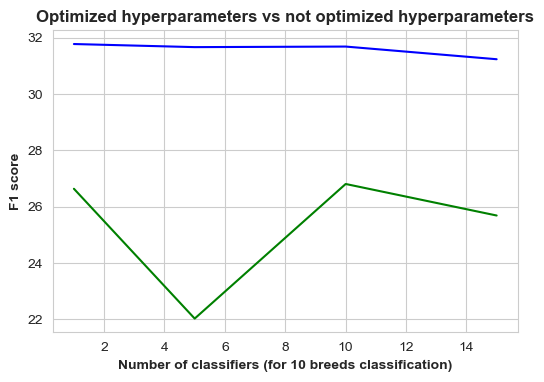

In [36]:
plt.figure(dpi=100)
plt.title("Optimized hyperparameters vs not optimized hyperparameters", fontweight="bold")
plt.xlabel("Number of classifiers (for 10 breeds classification)", fontweight="bold")
plt.ylabel("F1 score", fontweight="bold")
plt.plot(df_data_not_optimized_10_breeds['# classifiers'], df_data_not_optimized_10_breeds['f1 score'], color="green")
plt.plot(df_data_optimized_10_breeds['# classifiers'], df_data_optimized_10_breeds['f1 score'], color="blue")
plt.show()

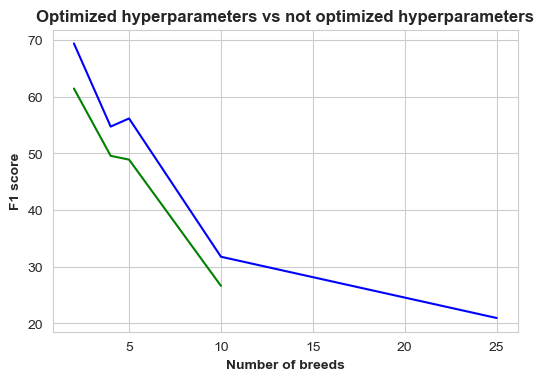

In [38]:
plt.figure(dpi=100)
plt.title("Optimized hyperparameters vs not optimized hyperparameters", fontweight="bold")
plt.xlabel("Number of breeds", fontweight="bold")
plt.ylabel("F1 score", fontweight="bold")
plt.plot(df_data_not_optimized_different_number_of_breeds['# breeds'], df_data_not_optimized_different_number_of_breeds['f1 score'], color="green")
plt.plot(df_data_optimized_different_number_of_breeds['# breeds'], df_data_optimized_different_number_of_breeds['f1 score'], color="blue")
plt.show()

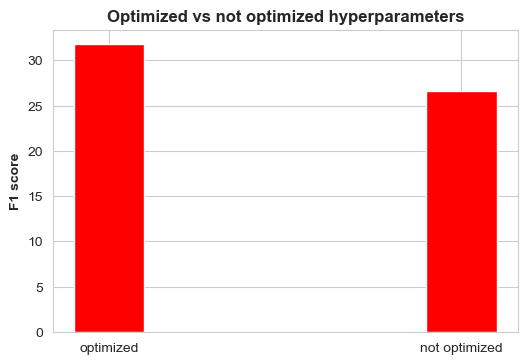

In [51]:
plt.figure(dpi=100)
plt.bar(df_data_10_breeds_optimized_not_optimized_diff['optimized?'], df_data_10_breeds_optimized_not_optimized_diff['f1 score'], color="red", width=0.2)
plt.ylabel("F1 score", fontweight="bold")
plt.title("Optimized vs not optimized hyperparameters", fontweight="bold")
plt.show()

Поради хардуерна и времева лимитация не съм пуснала трениране на модела за повече от 25 породи.